# Getting started with Glyco

This is a guide for how to get started with `glyco`.
In this notebook you will go through:
* How to read a glucose CSV file.
* How to plot simple summaries of glucose data.


To start make sure glyco is installed with the following command:

And then import `glyco` and call it `gl` for the rest of this notebook. 
This is just to make it easier to use.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import glyco as gl

# How to read a glucose CSV file
You can use the method `read_csv` to read a glucose CSV file.
Requirements on the file:
* The file MUST contain *at least*:
  * **a timestamp column**, by default this name is set to *Device Timestamp*. The name of the column can be passed to read_csv as an argument `timestamp_col`.
  * **a glucose column** this column MUST contain glucose in the currently handled [units which you can view in the documentation here](./docs/units.md), by default the column name is set to *Historic Glucose mmol/* the name of the column can be passed to read_csv as an argument `glucose_col`. 

We are going to read the CSV file under `examples/data/sample_glucose.csv`

In [18]:
file_path = 'examples/data/.data/ismail_last.csv'
glucose = gl.read_csv(file_path, unit_autodetect=True)

# display the first two rows
glucose.head(2)

Using unit autodetection.         This may end in unexpected behavior
Autodetected unit is (mmol/L)


,Device,Serial Number,Device Timestamp,Record Type,Historic Glucose mmol/L,Scan Glucose mmol/L,Non-numeric Rapid-Acting Insulin,Rapid-Acting Insulin (units),Non-numeric Food,Carbohydrates (grams),...,shifted_weekday_name,shifted_is_weekend,glucose,tsp,dg,dt,dg_dt,auc_mean,auc_lim,auc_min
tsp,,,,,,,,,,,,,,,,,,,,,
2019-12-05 17:41:00,FreeStyle LibreLink,b59d4499-1a07-462b-b7da-a179f2093996,05-12-2019 17:41,0,7.1,NaN,NaN,NaN,NaN,NaN,...,Thu,False,6.900000,2019-12-05 17:41:00,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-05 17:58:00,FreeStyle LibreLink,b59d4499-1a07-462b-b7da-a179f2093996,05-12-2019 17:58,0,6.9,NaN,NaN,NaN,NaN,NaN,...,Thu,False,6.966667,2019-12-05 17:58:00,0.066667,1020.0,0.000065,1338.968419,986.0,4862.0


In the case where there are extra rows, you can add the argument `skiprows`.
For example:

```Python
gl.read_csv(file_path, skiprows=1)
```

More [documentation on reading glucose files can be found in here](glucose.md).

Note that these sample files follow the export format that FreeStyle Libre uses. In case your CSV file contains different units or time formats from the default that glyco provides, you can pass these on to the read_csv method.

* **For a different glucose unit:** The default unit is **mmol/L** if your column has a different unit you should pass it as a *glucose_unit* argument. You can see a list of the handled [units in the documentation here](./docs/units.md)
* **For a different timestamp format:** Glyco uses the time format `"%d-%m-%Y %H:%M"` (Day-Month-Year Hour:Minute such as `31-01-2022 09:30`) if you want to use a different format, you must pass it to the `read_csv` method in the `timestamp_fmt` argument.



In [ ]:
# check the first index in the glucose dataframe
glucose.index[0]

Timestamp('2019-12-05 16:56:00')

Here's an example where we use all of the above inputs:

In [ ]:
# Example with all the above
from glyco.utils import Units

glucose = gl.read_csv(file_path, 
                    skiprows=0, 
                    timestamp_col= "Device Timestamp", 
                    glucose_col= "Historic Glucose mmol/L", 
                    glucose_unit=Units.mmolL.value, 
                    timestamp_fmt="%d-%m-%Y %H:%M"
                )

# display the first two glucose rows
glucose.head(2)

/Users/ismail/RestInGit/official/glyco/src/glyco/glucose.py:228: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[tlbl] = pd.to_datetime(df[tsp_lbl], format=tsp_fmt) # FIXME: .loc instead of [lbl]
/Users/ismail/RestInGit/official/glyco/src/glyco/glucose.py:229: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[dlbl] = df[tlbl].dt.date
/Users/ismail/RestInGit/official/glyco/src/glyco/glucose.py:230: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

,Device,Serial Number,Device Timestamp,Record Type,Historic Glucose mmol/L,Scan Glucose mmol/L,Non-numeric Rapid-Acting Insulin,Rapid-Acting Insulin (units),Non-numeric Food,Carbohydrates (grams),...,shifted_weekday_name,shifted_is_weekend,G,t,dg,dt,dg_dt,auc_mean,auc_lim,auc_min
t,,,,,,,,,,,,,,,,,,,,,
2019-12-05 16:56:00,FreeStyle LibreLink,b59d4499-1a07-462b-b7da-a179f2093996,05-12-2019 16:56,0,6.5,NaN,NaN,NaN,NaN,NaN,...,Thu,False,6.400000,2019-12-05 16:56:00,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-05 17:11:00,FreeStyle LibreLink,b59d4499-1a07-462b-b7da-a179f2093996,05-12-2019 17:11,0,6.7,NaN,NaN,NaN,NaN,NaN,...,Thu,False,6.533333,2019-12-05 17:11:00,0.133333,900.0,0.000148,799.02593,480.0,3900.0


**Note on the Glucose Dataframe**
The glucose dataframe contains multiple columns that are automatically generated by glyco.
These include: the timestamp, glucose, time and date columns (including the day, hour, week number etc.), and other values used for calculating metrics. You can read more in the  [./docs/concepts/glucose.md](./docs/concepts/glucose.md).

For the purpose of this tutorial we will only look at:
* `t` : the timestamp column (same as the index).
* `G` : The glucose value in `mmol/L`. Regardless of the input file unit `G` will always be in `mmol/L`.

In [ ]:
# TODO reorder?
glucose.columns

Index(['Device', 'Serial Number', 'Device Timestamp', 'Record Type',
       'Historic Glucose mmol/L', 'Scan Glucose mmol/L',
       'Non-numeric Rapid-Acting Insulin', 'Rapid-Acting Insulin (units)',
       'Non-numeric Food', 'Carbohydrates (grams)', 'Carbohydrates (servings)',
       'Non-numeric Long-Acting Insulin', 'Long-Acting Insulin Value (units)',
       'Notes', 'Strip Glucose mmol/L', 'Ketone mmol/L',
       'Meal Insulin (units)', 'Correction Insulin (units)',
       'User Change Insulin (units)', 'date', 'date_str', 'hour',
       'weekday_number', 'weekday_name', 'is_weekend', 'shifted_t',
       'shifted_date', 'shifted_date_str', 'shifted_hour',
       'shifted_weekday_number', 'shifted_weekday_name', 'shifted_is_weekend',
       'G', 't', 'dg', 'dt', 'dg_dt', 'auc_mean', 'auc_lim', 'auc_min'],
      dtype='object')

# How can you plot Glucose trends

when you have a glucose dataframe. Glyco provides methods to easily plot glucose trends, we will look at the following:
* `plot_glucose`

You can find more under [../docs/concepts/plotting.md](../docs/concepts/plotting.md)

### Plotting the general glucose curve with `plot_glucose`
As simple as:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


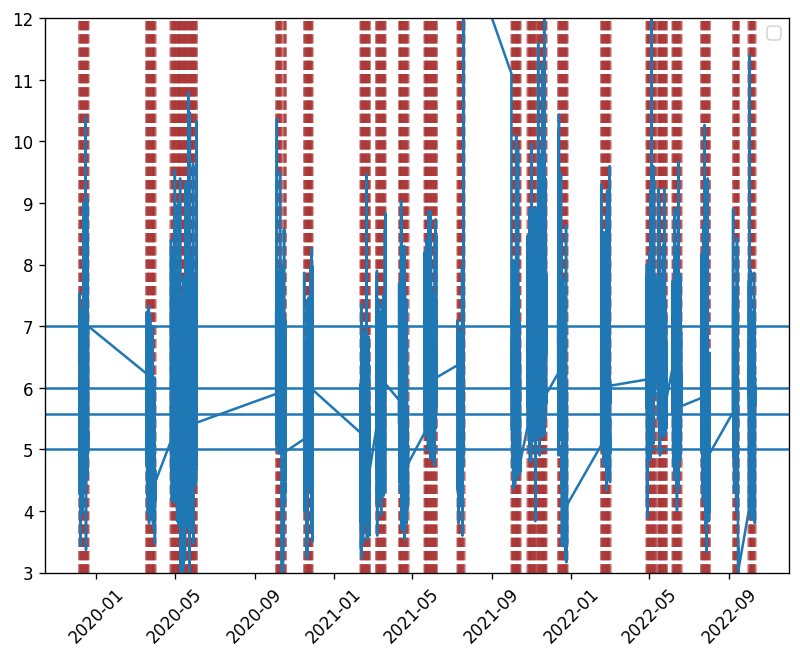

In [ ]:
gl.plot_glucose(glucose)

As you can see the dates here are scattered. To deal with this you can choose the exact times in glyco using `from_time` and/or `to_time`.
This can either be a of the types: `str`, `pd.Timestamp`, or `date`.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


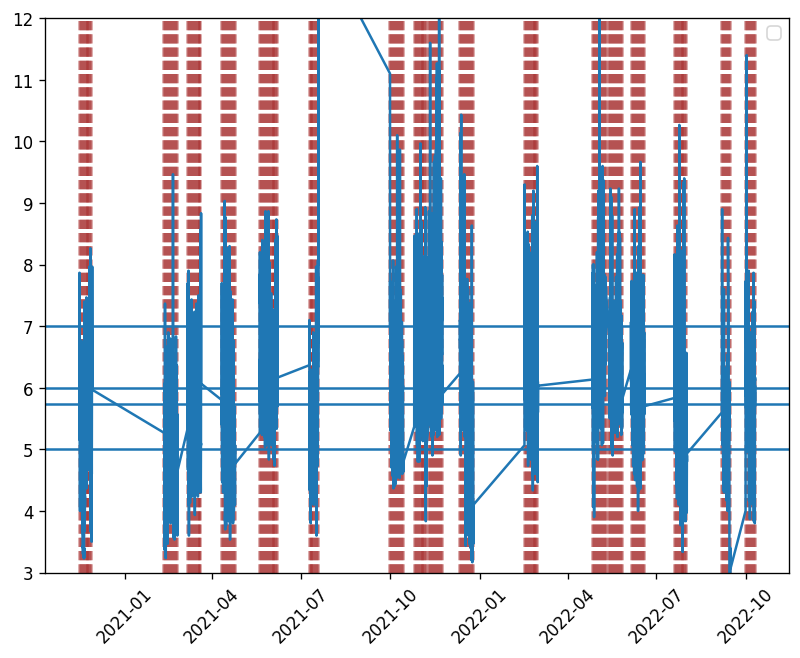

In [ ]:
gl.plot_glucose(glucose, from_time='2020-11-01')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


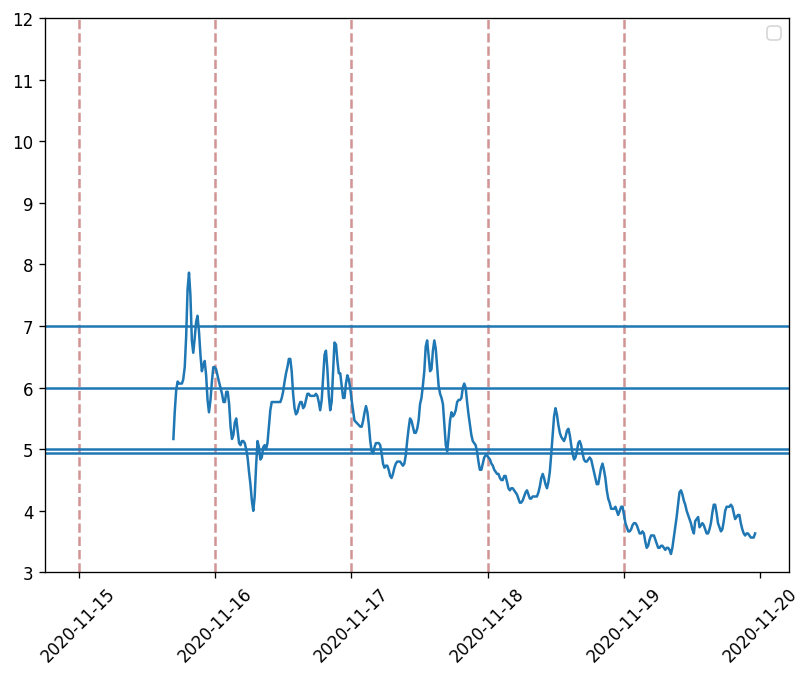

In [ ]:
gl.plot_glucose(glucose, from_time='2020-11-15', to_time='2020-11-19')

## Plotting trend by day or week

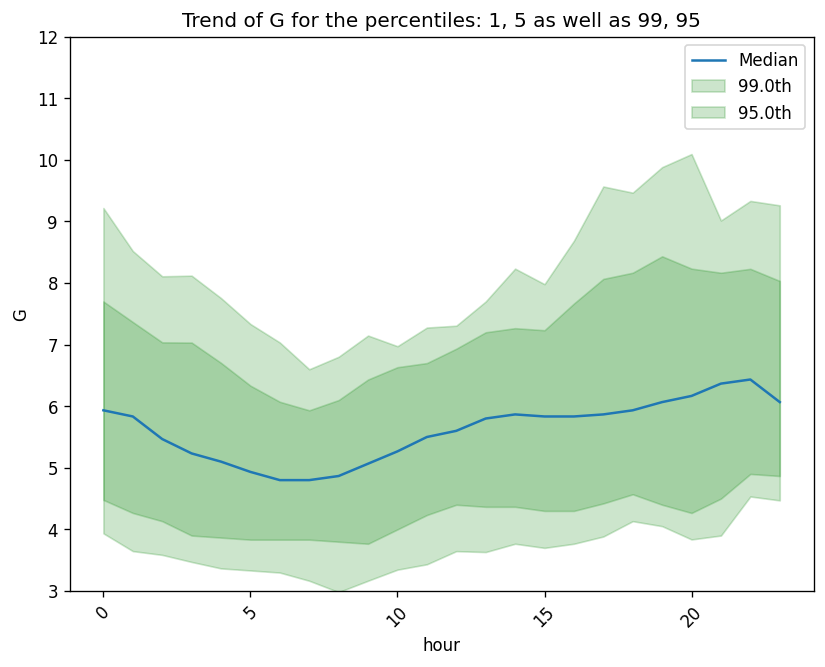

In [ ]:
gl.plot_daily_trend(glucose)

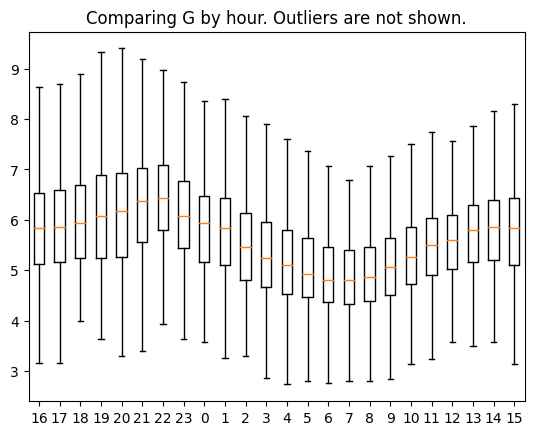

In [ ]:
gl.plot_comparison(glucose, compare_by='hour')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


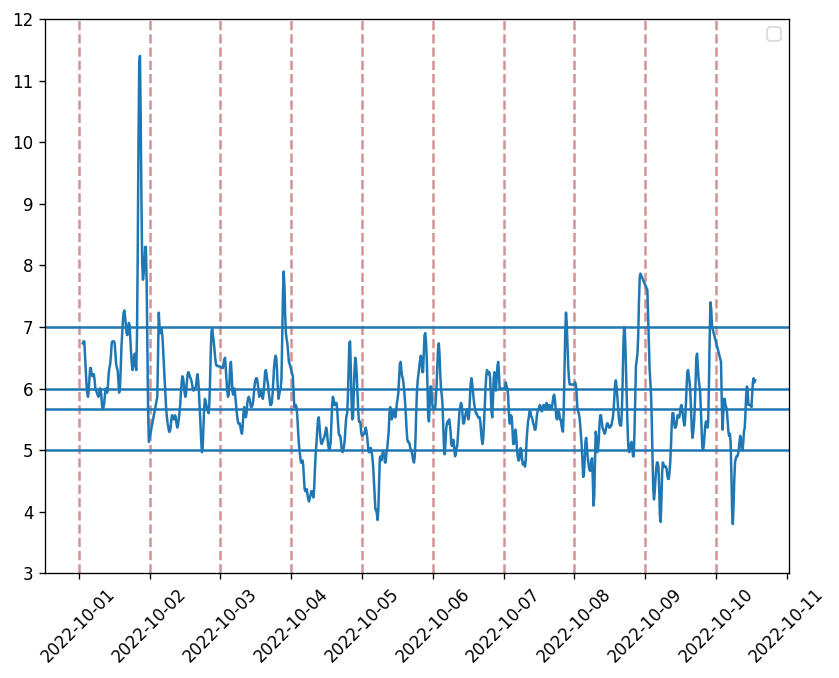

In [ ]:
gl.plot_glucose(glucose, from_time='2022-10')

## How to include meals in the analysis?
To analyse meal data you can use meals from either:
* A csv file
* A meals dataframe
* If the data is from FreeStyle libre you can get it from the glucose dataframe.


To do so you must have the glucose dataframe already

In [ ]:
original_meals_df = gl.infer_events_from_notes(glucose)

0

In [ ]:
glucose[glucose['Record Type']==6]

,Device,Serial Number,Device Timestamp,Record Type,Historic Glucose mmol/L,Scan Glucose mmol/L,Non-numeric Rapid-Acting Insulin,Rapid-Acting Insulin (units),Non-numeric Food,Carbohydrates (grams),...,shifted_weekday,shifted_is_weekend,G,t,dg,dt,dg_dt,auc_mean,auc_lim,auc_min
t,,,,,,,,,,,,,,,,,,,,,


In [ ]:
original_meals_df

,Device,Serial Number,Device Timestamp,Record Type,Historic Glucose mmol/L,Scan Glucose mmol/L,Non-numeric Rapid-Acting Insulin,Rapid-Acting Insulin (units),Non-numeric Food,Carbohydrates (grams),...,shifted_weekday,shifted_is_weekend,G,t,dg,dt,dg_dt,auc_mean,auc_lim,auc_min
t,,,,,,,,,,,,,,,,,,,,,
